## Setup

We'll use the mpg dataset and predict whether a car has automatic or manual transmission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mpg = pydataset.data('mpg')
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [3]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## `.cross_val_score`

In [5]:
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

In [6]:
# TODO: loop through various depths and plot accuracy against depth
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    cross_val_score(clf, X_train, y_train, cv=5).mean()
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    print(f'{depth:2} | {score:.3f}')

 1 | 0.617
 2 | 0.589
 3 | 0.600
 4 | 0.611
 5 | 0.617
 6 | 0.669
 7 | 0.669
 8 | 0.629
 9 | 0.623
10 | 0.640


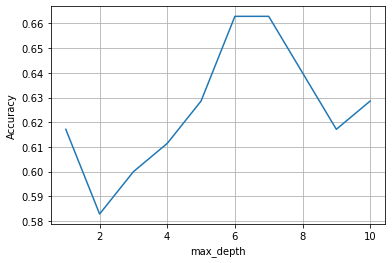

In [7]:
# TODO: loop through various depths and plot accuracy against depth
scores = {}
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores[depth] = score


pd.Series(scores).plot()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.grid()

In [8]:
# TODO: use a metric other than accuracy
from sklearn.metrics import precision_score, make_scorer

clf = DecisionTreeClassifier(max_depth=4)
# pos_label =  manual is necessary because our y is not 1s and 0s
cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(precision_score, pos_label='manual')).mean()

0.46333333333333326

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


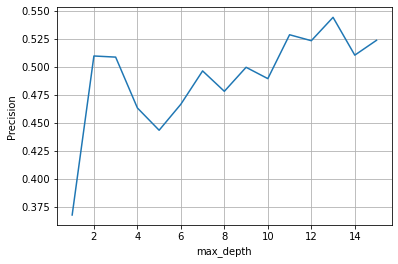

In [9]:
def evaluate_dtree(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scorer_function =  make_scorer(precision_score, pos_label='manual')
    return cross_val_score(clf, X_train, y_train, cv=5, scoring=scorer_function).mean()

pd.Series({depth: evaluate_dtree(depth) for depth in range(1,16)}).plot()
plt.ylabel('Precision')
plt.xlabel('max_depth')
plt.grid()

## Grid Search

In [10]:
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, {'n_neighbors': range(1, 21)}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [11]:
grid.cv_results_

{'mean_fit_time': array([0.00149765, 0.00119519, 0.00131211, 0.0011795 , 0.00123549,
        0.00117459, 0.00128102, 0.00155702, 0.00150027, 0.0015624 ,
        0.00219359, 0.00175705, 0.00129042, 0.00126243, 0.00129547,
        0.00115967, 0.0012754 , 0.00119023, 0.00119519, 0.00116439]),
 'std_fit_time': array([1.78366776e-04, 5.73278453e-05, 1.06823295e-04, 5.89212146e-05,
        1.13812050e-04, 5.54222641e-05, 1.83311300e-04, 3.39465514e-04,
        1.59215534e-04, 3.36547511e-04, 7.83899355e-04, 1.76477400e-04,
        8.72135814e-05, 1.14740833e-04, 1.38825437e-04, 3.80992591e-05,
        1.55006156e-04, 4.15771925e-05, 8.02713966e-05, 1.44422632e-05]),
 'mean_score_time': array([0.00198517, 0.00160594, 0.00168905, 0.00158243, 0.00164571,
        0.00158024, 0.00175719, 0.00189209, 0.00191593, 0.00196419,
        0.00236564, 0.00270243, 0.0016952 , 0.00168128, 0.00170774,
        0.00158176, 0.0017118 , 0.00168142, 0.00164623, 0.00160179]),
 'std_score_time': array([2.90092561e-

In [12]:
grid.cv_results_['mean_test_score']

array([0.59428571, 0.62857143, 0.60571429, 0.62857143, 0.61142857,
       0.61142857, 0.57142857, 0.62285714, 0.6       , 0.64      ,
       0.62285714, 0.65142857, 0.62857143, 0.62285714, 0.64      ,
       0.64      , 0.65142857, 0.63428571, 0.61714286, 0.64      ])

In [13]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [14]:
# TODO: look at the best score, params
grid.best_score_, grid.best_params_

(0.6514285714285715, {'n_neighbors': 12})

In [15]:
# TODO: get the best model
grid.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [16]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [21]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']

In [22]:
results.sort_values(by='score').tail(30)

,max_depth,min_samples_leaf,score
187,19,8,0.638889
67,7,8,0.638889
30,4,1,0.639542
54,6,5,0.643791
41,5,2,0.643791
52,6,3,0.644118
181,19,2,0.644444
151,16,2,0.644444
131,14,2,0.644771
107,11,8,0.644771


In [17]:
# TODO: get all the info into one list of dicts

In [18]:
# TODO: convert to a dataframe

## Exercise

1. Use the cross validation techniques described in the lesson to find the best model for predicting transmission type with the mpg dataset.
1. Use cross validation techniques to determine the best model for predicting survival with the titanic dataset.
1. Use cross validation techniques to determine the best model for predicting tip amount with the tips dataset.